# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [21]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [22]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [23]:
#  1. Get the total rides for each city type
ride_count_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count_by_type.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [24]:
# 2. Get the total drivers for each city type
driver_count_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_count_by_type.head()


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [25]:
#  3. Get the total amount of fares for each city type
fares_total_per_type = pyber_data_df.groupby(["type"]).sum()["fare"]
fares_total_per_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [26]:
#  4. Get the average fare per ride for each city type. 
fare_avg_per_ride_type = pyber_data_df.groupby(["type"]).mean()["fare"]
fare_avg_per_ride_type.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [27]:
# 5. Get the average fare per driver for each city type. 
fare_avg_per_driver_type = pyber_data_df.groupby(["type"]).sum()["fare"]/city_data_df.groupby(["type"]).sum()["driver_count"]
fare_avg_per_driver_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [28]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides":ride_count_by_type,
                                " Total Drivers":driver_count_by_type,
                                "Total Fares":fares_total_per_type,
                                "Avg Fare per Ride":fare_avg_per_ride_type,
                                "Avg Fare per Driver":fare_avg_per_driver_type})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [29]:
#  7. Cleaning up the DataFrame. Format dates to a standard format, Delete the index name
pyber_data_df['date']=pd.to_datetime(pyber_data_df['date'])
pyber_summary_df.index.name = None

In [30]:
#  8. Format the columns.
pyber_summary_df = pd.DataFrame({"Total Rides":ride_count_by_type.map("{:,}".format),
                                " Total Drivers":driver_count_by_type.map("{:,}".format),
                                "Total Fares":fares_total_per_type.map("${:,.2f}".format),
                                "Avg Fare per Ride":fare_avg_per_ride_type.map("${:,.2f}".format),
                                "Avg Fare per Driver":fare_avg_per_driver_type.map("${:,.2f}".format)})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [31]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban


In [32]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_total_per_day = pyber_data_df.groupby(["city","type","date"]).sum()["fare"]
fares_total_per_day

city          type   date               
Amandaburgh   Urban  2019-01-02 09:57:00    33.06
                     2019-01-11 02:22:00    29.24
                     2019-01-13 16:04:00    23.35
                     2019-01-21 04:12:00     9.26
                     2019-01-29 23:28:00    41.06
                                            ...  
Williamsview  Urban  2019-04-15 16:09:00    44.74
                     2019-04-16 08:23:00    20.38
                     2019-04-18 02:07:00    39.79
                     2019-04-26 00:30:00    20.89
                     2019-05-04 14:56:00    32.80
Name: fare, Length: 2375, dtype: float64

In [33]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_total_per_day = fares_total_per_day.reset_index()
fares_total_per_day.head()

,city,type,date,fare
0,Amandaburgh,Urban,2019-01-02 09:57:00,33.06
1,Amandaburgh,Urban,2019-01-11 02:22:00,29.24
2,Amandaburgh,Urban,2019-01-13 16:04:00,23.35
3,Amandaburgh,Urban,2019-01-21 04:12:00,9.26
4,Amandaburgh,Urban,2019-01-29 23:28:00,41.06


In [34]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_total_per_day_pivot = pd.pivot_table(fares_total_per_day, index=['date'], columns=['type'], values='fare')
fares_total_per_day_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [35]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'
jan_apr_fares_per_day = fares_total_per_day_pivot.loc["2019-01-01":"2019-04-28"]
jan_apr_fares_per_day.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43
2019-04-28 17:38:00,NaN,34.87,NaN
2019-04-28 19:35:00,NaN,16.96,NaN


In [36]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
jan_apr_fares_per_day.index = pd.to_datetime(jan_apr_fares_per_day.index)

In [37]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_apr_fares_per_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [38]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
jan_apr_fares_per_week = jan_apr_fares_per_day.resample("W").sum()
jan_apr_fares_per_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.600,1661.680
2019-01-13,67.65,1070.825,2050.430
2019-01-20,306.00,1218.200,1939.020
2019-01-27,179.69,1203.280,2098.470
2019-02-03,333.08,1042.790,2070.490
2019-02-10,115.80,974.340,2162.640
2019-02-17,95.82,1045.500,2235.070
2019-02-24,419.06,1412.740,2466.290
2019-03-03,175.14,858.460,2218.200


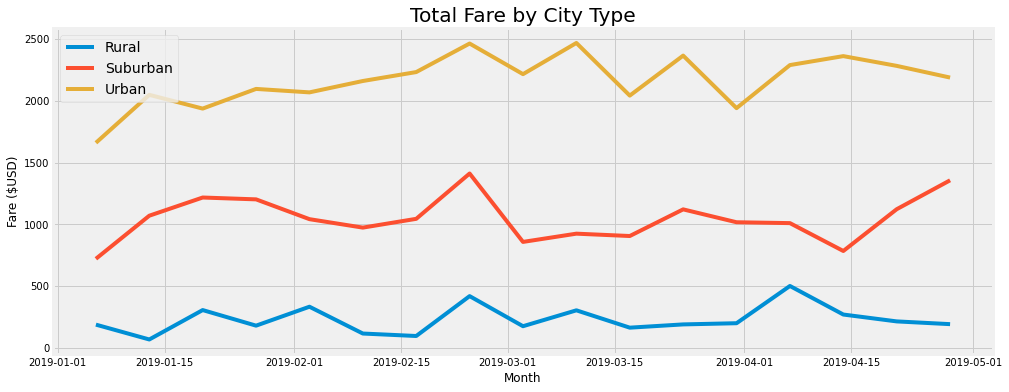

In [39]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(jan_apr_fares_per_week)

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


    # My Additions Create titles, axis labels, and legend
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("Month")
ax.legend(jan_apr_fares_per_week)

    # My addition Save plot to analysis folder
plt.savefig("analysis/pyber_challenge.png")

plt.show()
